### EDA(Exploratory Data Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#讀入資料
test_users = pd.read_csv("test_users.csv")
train_users = pd.read_csv("train_users_2.csv")
print(train_users.shape)
print(test_users.shape)
#train有213451筆，16個特徵，test有62096筆、15特徵，相差目標變數country_destination

(213451, 16)
(62096, 15)


In [3]:
#test_users.head()

#### 查看整體資料(train&test)

In [4]:
print(train_users.isnull().sum())
#發現train_users在date_first_booking、age、first_affiliate_tracked有大量missing data
for num in train_users.isnull().sum():
    if num > 0:
        print('missing '+str(int(num/train_users.shape[0]*100))+'% data')
#計算一下missing的比例再決定是否要補值或是刪除

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64
missing 58% data
missing 41% data
missing 2% data


In [5]:
print(test_users.isnull().sum())
for num in test_users.isnull().sum():
    if num > 0:
        print('missing '+str(int(num/test_users.shape[0]*100))+'% data')
#確定date_first_booking會刪除

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64
missing 100% data
missing 46% data
missing 0% data


In [6]:
#合併test和train
all_users = pd.concat((train_users, test_users), axis = 0, ignore_index = True)
#ignore_index = True 可以讓index重新排序才不會有重複的index

C:\Users\ShawnHou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#### 查看各個欄位資料情況(單變數)

##### 1.country_destination

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64


Text(0, 0.5, 'percentage')

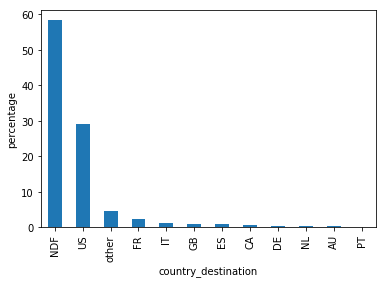

In [7]:
#查看train_users當中country_destination的數量分布
print(train_users.country_destination.value_counts())
country_destination_percentage = train_users.country_destination.value_counts() / train_users.shape[0] * 100
country_destination_percentage.plot('bar')
plt.xlabel('country_destination')
plt.ylabel('percentage')
#在traindata當中NDF(57%)和US(28%)就佔了接近90%

##### 2. age

In [8]:
all_users.age.describe()
#1歲和2014都不合理

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

users_age < 20 :3035
users_age < 100 :155960
users_age > 100 :2690


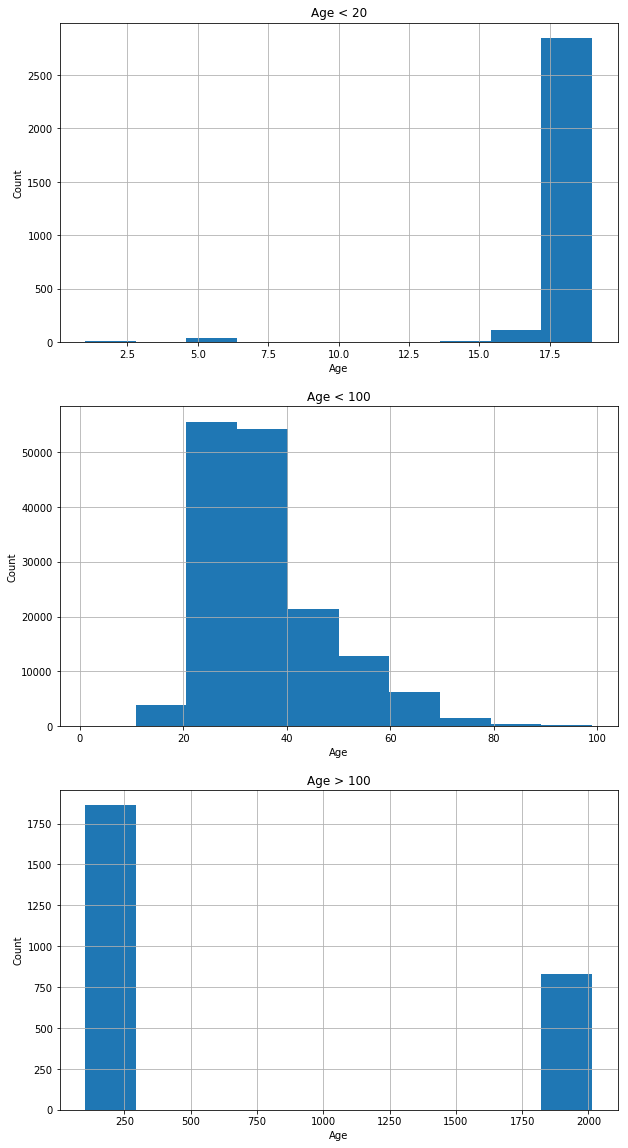

In [9]:
plt.figure(figsize = (10, 20))
plt.subplot(3,1,1)
plt.title('Age < 20')
plt.xlabel('Age')
plt.ylabel('Count')
all_users[all_users.age < 20].age.hist(bins = 10)
print('users_age < 20 :'+str(all_users[all_users.age < 20].age.value_counts().sum()))
plt.subplot(3,1,2)
plt.title('Age < 100')
plt.xlabel('Age')
plt.ylabel('Count')
all_users[all_users.age < 100].age.hist(bins = 10)
print('users_age < 100 :'+str(all_users[all_users.age < 100].age.value_counts().sum()))
plt.subplot(3,1,3)
plt.title('Age > 100')
plt.xlabel('Age')
plt.ylabel('Count')
all_users[all_users.age > 100].age.hist(bins = 10)
print('users_age > 100 :'+str(all_users[all_users.age > 100].age.value_counts().sum()))
#發現有2690筆大於100歲的和2000多的應該是填錯資料
#大多數的人是從25到40歲

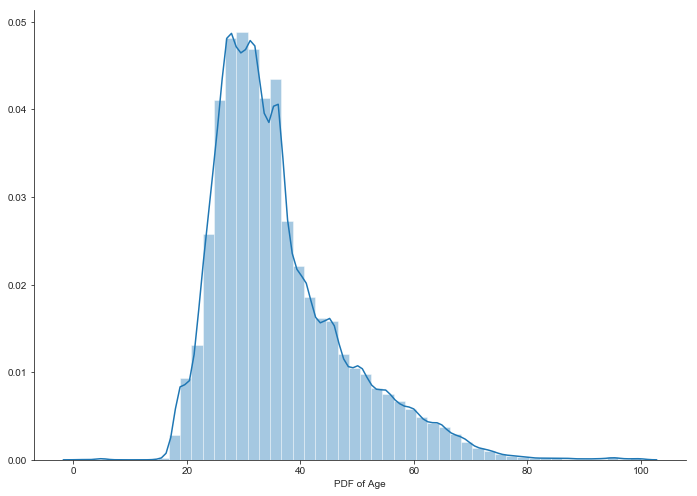

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
all_users['age']=all_users['age'].apply(lambda x : 36 if x>100 else x)
sns.distplot(all_users.age.dropna())
plt.xlabel('PDF of Age')
sns.despine()

##### 3. date_account_created

Text(0, 0.5, 'Count')

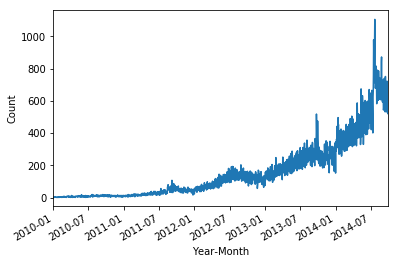

In [10]:
pd.to_datetime(all_users.date_account_created).value_counts().plot('line')
plt.xlabel('Year-Month')
plt.ylabel('Count')
#帳號創建逐年上升，2014特別迅速

In [11]:
all_users['date_account_created'] = pd.to_datetime(all_users['date_account_created'])
all_users['dac_year'] = all_users.date_account_created.dt.year
all_users['dac_month'] = all_users.date_account_created.dt.month
all_users['dac_day'] = all_users.date_account_created.dt.day
all_users['dac_weekday'] = all_users.date_account_created.dt.weekday_name

'從2010到2014airbnb人數快速上升，\n幾乎是倍數成長，以月分來看7、8、9月是創帳號高峰期，\n以天來看只有月底特別低，以星期幾來看是六日特別低。'

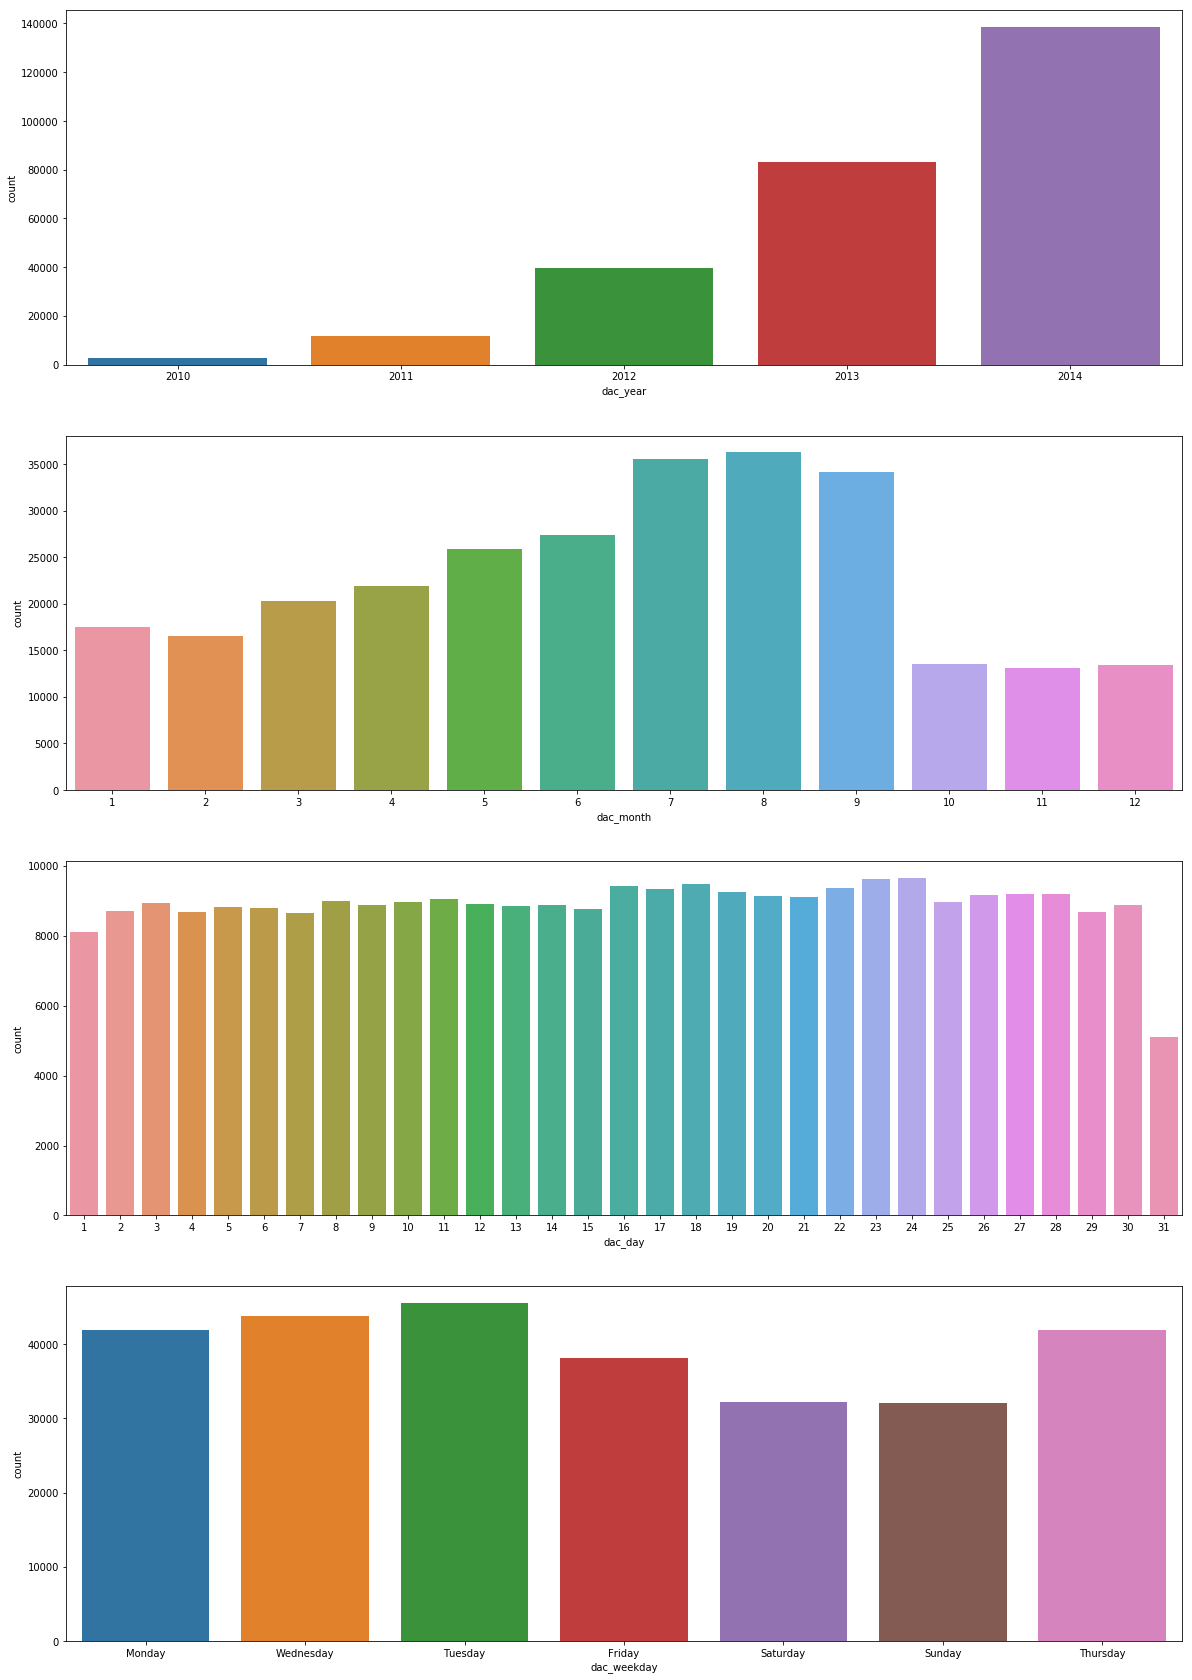

In [12]:
plt.figure(figsize = (20, 30))
plt.subplot(4,1,1)
sns.countplot(all_users['dac_year'])
plt.subplot(4,1,2)
sns.countplot(all_users['dac_month'])
plt.subplot(4,1,3)
sns.countplot(all_users['dac_day'])
plt.subplot(4,1,4)
sns.countplot(all_users['dac_weekday'])
'''從2010到2014airbnb人數快速上升，
幾乎是倍數成長，以月分來看7、8、9月是創帳號高峰期，
以天來看只有月底特別低，以星期幾來看是六日特別低。'''

##### 4. gender

Text(0, 0.5, 'Percentage')

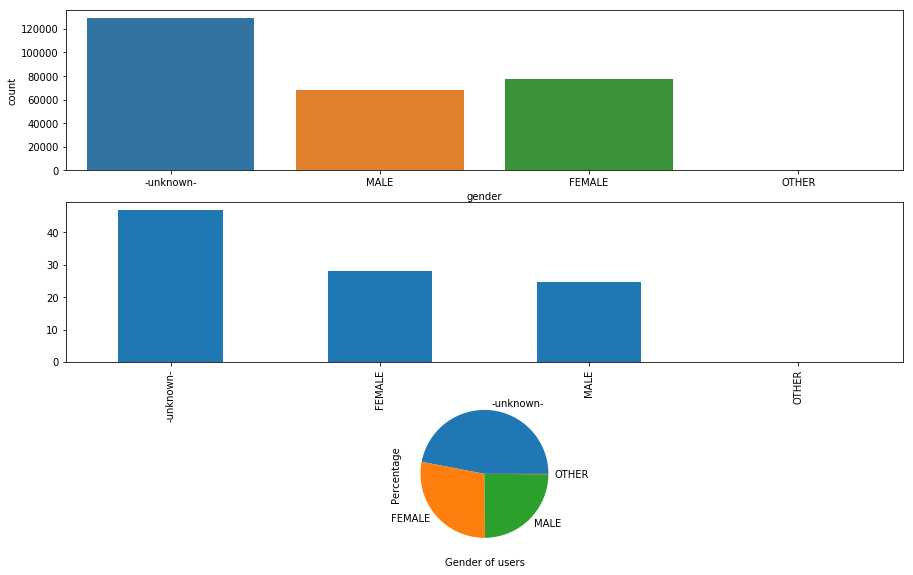

In [13]:
plt.figure(figsize = (15, 10))
plt.subplot(3,1,1)
sns.countplot(all_users['gender'])
plt.subplot(3,1,2)
gender_percentage = all_users.gender.value_counts() / all_users.shape[0] * 100
gender_percentage.plot('bar')
plt.subplot(3,1,3)
gender_percentage.plot('pie')
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
#45%的unknown，男女差不多

##### 5. timestamp_first_active=>date_first_active

Text(0, 0.5, 'Count first active')

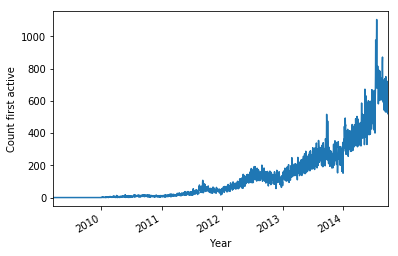

In [14]:
all_users['date_first_active'] = pd.to_datetime(all_users.timestamp_first_active // 1000000, format = '%Y%m%d')
all_users.date_first_active.value_counts().plot('line')
plt.xlabel('Year')
plt.ylabel('Count first active')
#發現date_account_created和date_first_active圖形很像，可見很多人是要用airbnb才去辦帳號，辦完直接使用。

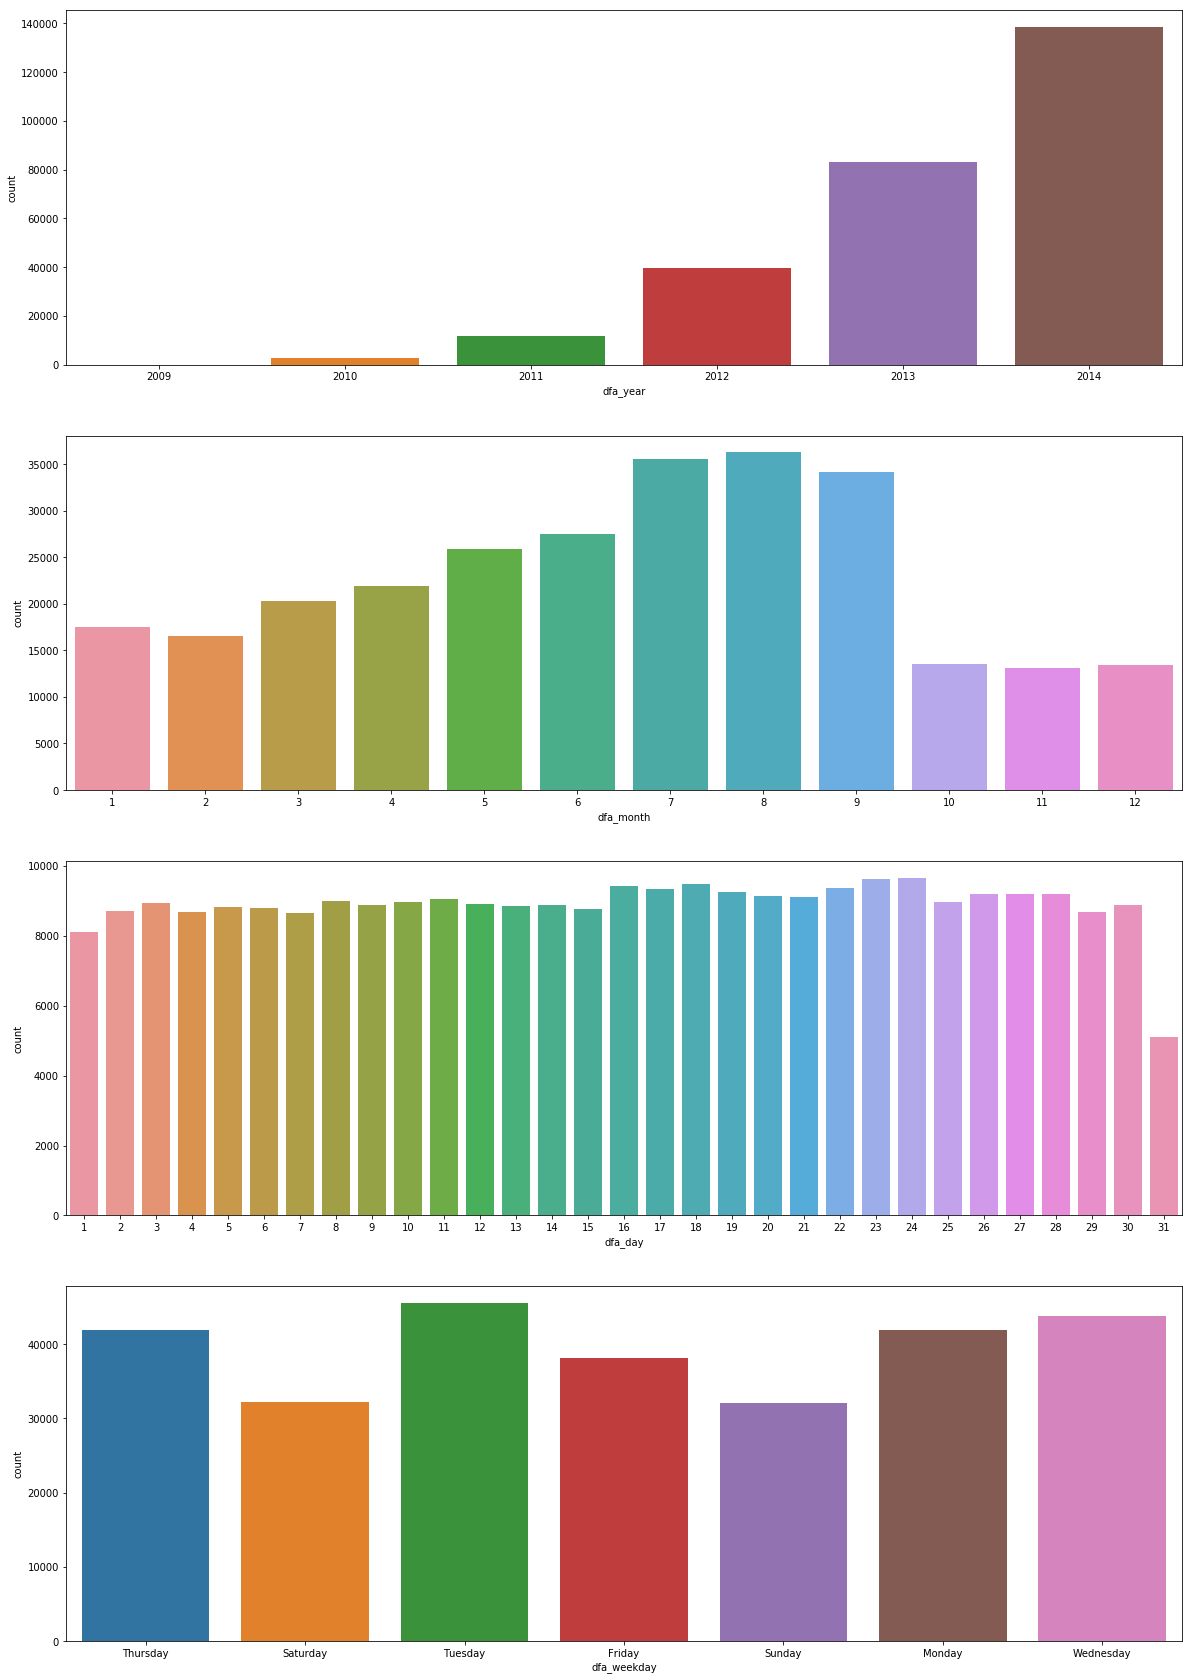

In [15]:
all_users['dfa_year'] = all_users.date_first_active.dt.year
all_users['dfa_month'] = all_users.date_first_active.dt.month
all_users['dfa_day'] = all_users.date_first_active.dt.day
all_users['dfa_weekday'] = all_users.date_first_active.dt.weekday_name
plt.figure(figsize = (20, 30))
plt.subplot(4,1,1)
sns.countplot(all_users['dfa_year'])
plt.subplot(4,1,2)
sns.countplot(all_users['dfa_month'])
plt.subplot(4,1,3)
sns.countplot(all_users['dfa_day'])
plt.subplot(4,1,4)
sns.countplot(all_users['dfa_weekday'])

##### 6. signup_method/signup_app

In [16]:
all_users.signup_method.value_counts()

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

In [17]:
all_users.signup_app.value_counts()

Web        219918
iOS         34593
Android     10519
Moweb       10517
Name: signup_app, dtype: int64

##### 7. first_device_type / first_browser

In [18]:
all_users.first_device_type.value_counts()

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

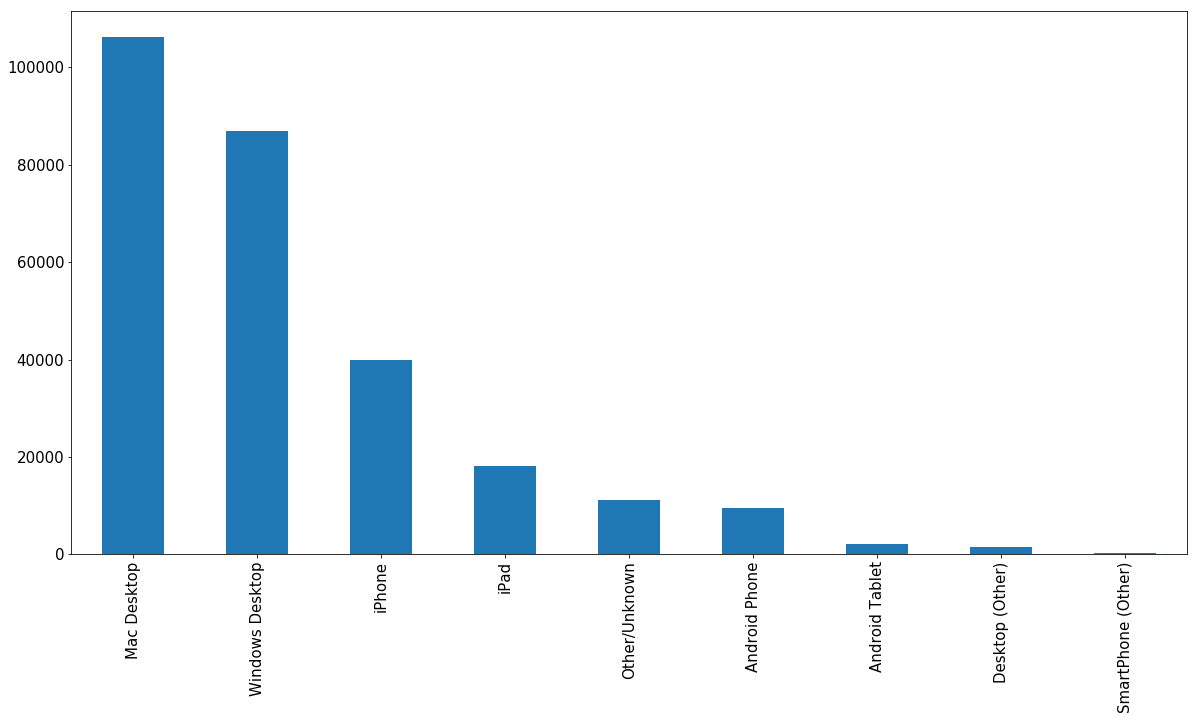

In [23]:
plt.figure(figsize = (20, 10))
all_users.first_device_type.value_counts().plot('bar',fontsize = 15)

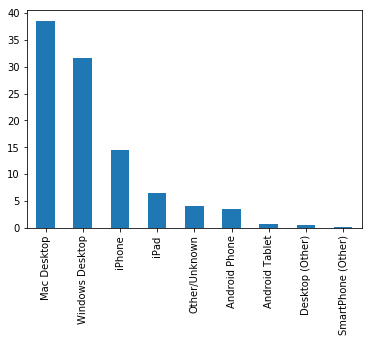

In [24]:
device_percentage = all_users.first_device_type.value_counts() / all_users.shape[0] * 100
device_percentage.plot('bar')

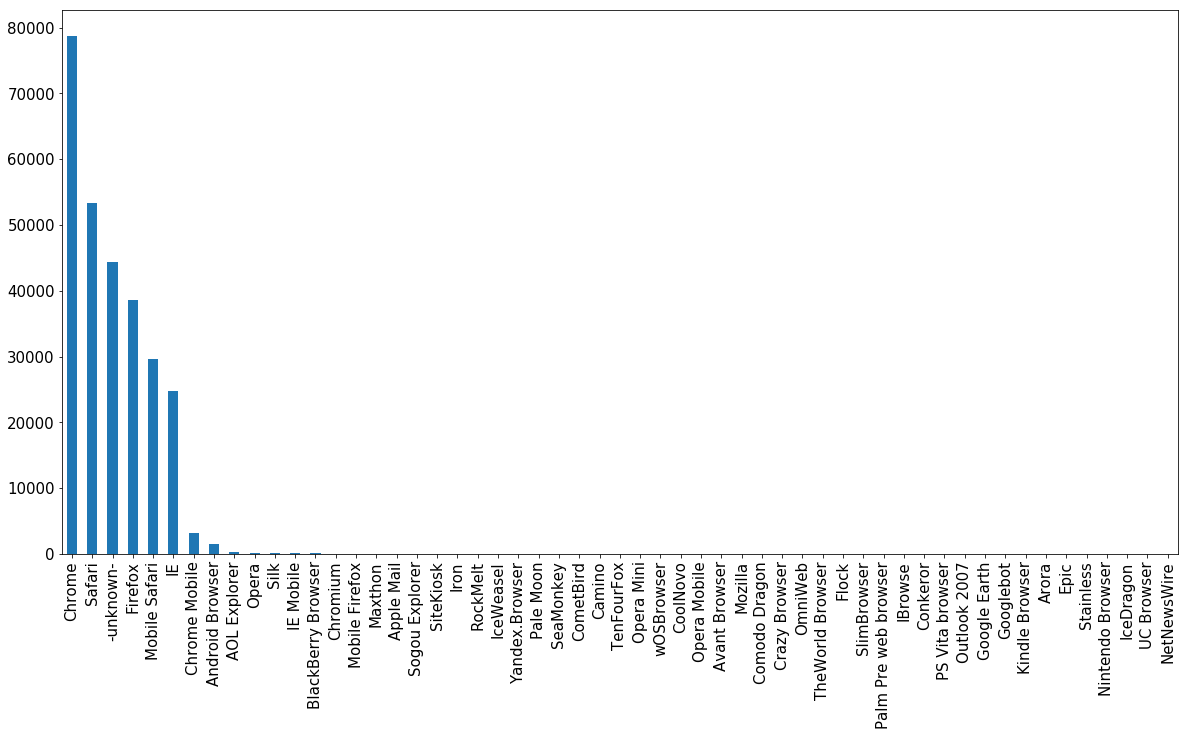

In [19]:
plt.figure(figsize = (20, 10))
all_users.first_browser.value_counts().plot('bar',fontsize = 15)

##### 8. language

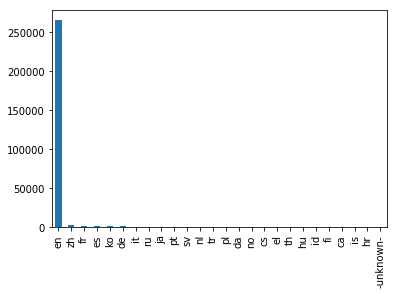

In [20]:
all_users.language.value_counts().plot('bar')
#大多數都使用英文(96%)

##### 9. affiliate_channel / affiliate_provider

In [21]:
all_users.affiliate_channel.value_counts()

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

In [22]:
all_users.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

#### 查看不同欄位結合的資料情況(雙變數)

In [45]:
all_users.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'dac_year', 'dac_month',
       'dac_day', 'dac_weekday', 'date_first_active', 'dfa_year', 'dfa_month',
       'dfa_day'],
      dtype='object')

Text(0, 0.5, 'Percentage')

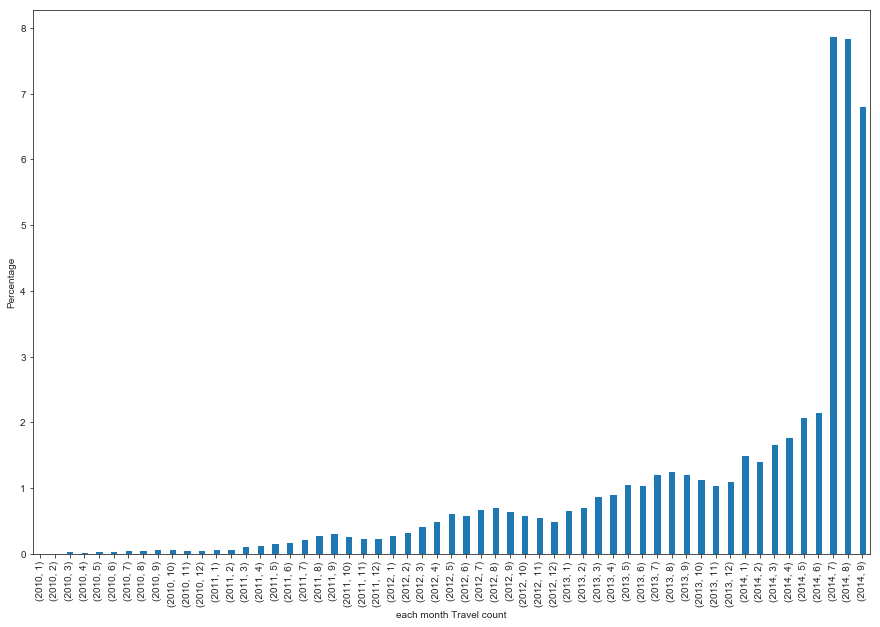

In [68]:
#年月+country_destination
plt.figure(figsize = (15, 10))
data_without_NDF = all_users[all_users['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
all_users['booked'] = all_users.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = all_users.groupby(['dac_year','dac_month']).booked.sum() / all_users.shape[0] * 100
destination_percentage.plot('bar')
plt.xlabel('each month Travel count')
plt.ylabel('Percentage')
#每年的789都會特別多人，2014急遽上升

Text(0, 0.5, 'Number of users')

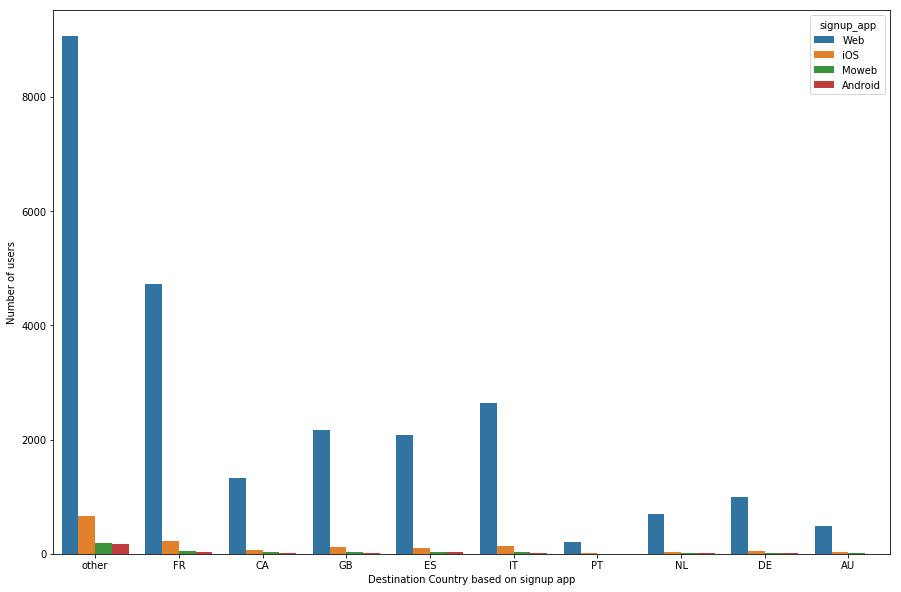

In [53]:
plt.figure(figsize = (15, 10))
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')

在不同地區，Web上註冊的人數都遠遠超過其他的

Text(0, 0.5, 'Age of Users')

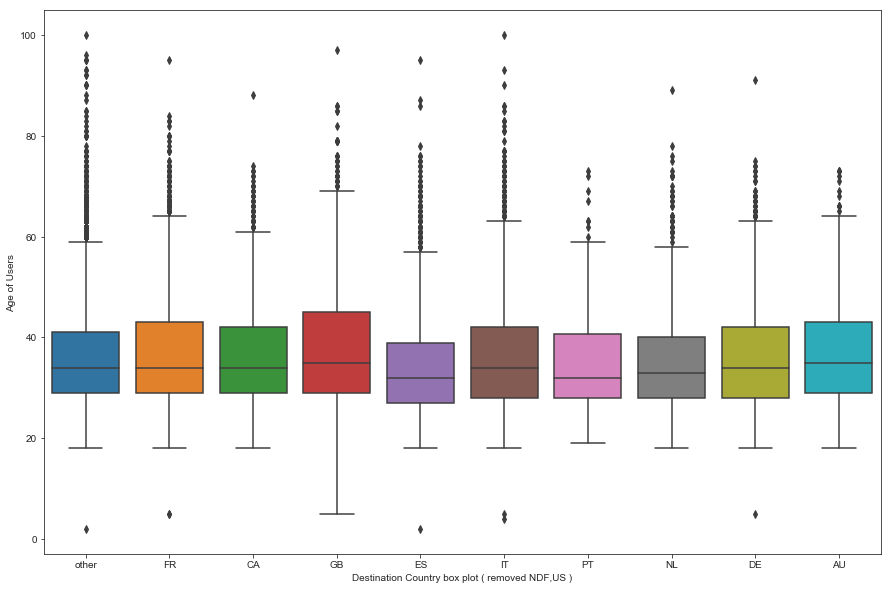

In [71]:
plt.figure(figsize = (15, 10))
sns.boxplot(y='age' , x='country_destination',data=data_without_NDF1)
plt.xlabel('Destination Country box plot ( removed NDF,US )')
plt.ylabel('Age of Users')

ES、PT、NL都較年輕，GB的較年長